# Prova I - Computação Científica II

### Aluno: Daniel Anselmo Nascimento de Souza

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

Temos que para o problema de $ \frac{du}{dt} = \lambda u $, a solução analítica é da forma: $ u(t) = e^{\lambda u} $. Dessa forma, para a solução analítica convergir precisamos que $Re(\lambda) < 0$ .


Usando o método de Crank-Nicolson, temos que:

$$ u_{n+1} = u_n + \frac{h}{2} \cdot (f_n + f_{n+1}) $$

$$ u_{n+1} = u_n + \frac{h}{2} \cdot (\lambda u_n + \lambda u_{n+1}) $$

$$ u_{n+1} - \frac{h}{2} \cdot u_{n+1} = un + \frac{h}{2} \lambda u_n $$

Dessa forma, temos que:

$$ u_{n+1} = u_n \cdot \frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}  $$

Para $n=0$, temos:

$$ u_{1} = u_0 \cdot \frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}  $$

Para $n=1$, temos:

$$ u_{2} = u_1 \cdot \frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}  =  u_0 \cdot \bigg(\frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}\bigg)^{2}  $$

Generalizando, temos que:

$$ u_{n+1} = u_0 \cdot \bigg(\frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}\bigg)^{n+1}  $$

Para os pontos $u_{n}$ convergirem, precisamos que o valor absoluto da expressão $\frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}$ seja menor ou igual a 1.

Dessa forma, a região de estabilidade do método de Crank-Nicolson é:

$$ \Bigg|\frac{1 +  \frac{\lambda h}{2}}{1 -  \frac{\lambda h}{2}}\Bigg| \leq 1 $$

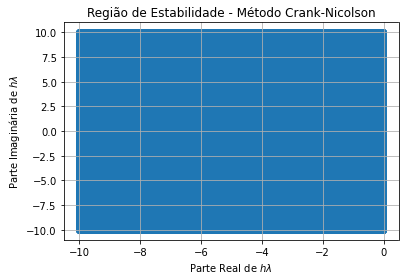

In [ ]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)

pares = []

for i in range(len(x)):
  for j in range(len(y)):
    pares.append((x[i], y[j]))

z = []

for i in pares:
  z.append(complex(i[0], i[1]))

z = np.array(z)

def ineq_crank(hlambd):
  return (1 + (hlambd)/2)/(1 - (hlambd)/2)

pontos_reg = []
eixo_x = []

for i in z:
  if abs(ineq_crank(i)) < 1:
    eixo_x.append(i.real)
    pontos_reg.append(i.imag)

eixo_x = np.array(eixo_x)
pontos_reg = np.array(pontos_reg)

plt.scatter(eixo_x, pontos_reg)
plt.xlabel('Parte Real de $h \lambda$')
plt.ylabel('Parte Imaginária de $h \lambda$')
plt.title('Região de Estabilidade - Método Crank-Nicolson')
plt.grid()
plt.show()

# Questão 3

## Letra a)

$$ - \epsilon \frac{d^2 u}{dx^2} + \frac{du}{dx} = 0  $$

Substituindo $\frac{d^2 u}{dx^2}$ por $r^2$ e $\frac{du}{dx} $ por $r$, temos que:

$$ -\epsilon r^2  + r = 0 $$

$$ r(-\epsilon r + 1) = 0 $$

Calculando os valores de $r$, temos:

$ r_1 = 0$ e $ r_2 = \frac{1}{\epsilon} $

A solução dessa equação diferencial é da forma:

$$ u(x) = c_1 \cdot e^{r_1 x} + c_2 \cdot e^{r_2 x} $$

Substituindo os valores de $r_1$ e $r_2$, temos:

$$ u(x) = c_1 + c_2 \cdot e^{\frac{x}{\epsilon}} $$

Usando as condições do enunciado, $ u(0) = 0$ e $ \frac{du(1)}{dx} = 1$, temos que

$$  \left \{ \begin{matrix} c_1 + c_2 = 0 & \mbox{ }\mbox{} \\  c_2 \cdot \frac{1}{\epsilon} \cdot e^{\frac{1}{\epsilon}} = 1 & \mbox{}\mbox{} \end{matrix} \right. $$

Resolvendo o sistema, temos que:

$$ c_1 = - \frac{\epsilon}{e^{\frac{1}{\epsilon}}} $$

<br>

$$ c_2 = \frac{\epsilon}{e^{\frac{1}{\epsilon}}} $$

Dessa forma, temos que a solução analítica para essa equação é:

$$ u(x) = \epsilon \cdot e^{-\frac{1}{\epsilon}} \cdot (-1 + e^{\frac{x}{\epsilon}}) $$

In [ ]:
def analitica(x, eps):
  return (eps/np.exp(1/eps)) * (-1 + np.exp(x/eps))

## Letra b)

Vamos construir nosso grid entre $x_0$ e $x_{N+1}$ de forma que nosso $x_0 = u(0) = 0$ e nosso $x_{N} = u(1)$


Vamos querer calcular os pontos internos desse grid. Usando as aproximações da derivada de 2ª ordem e derivada central, temos:

$$ \frac{du_i}{dx} = \frac{u_{i+1} - u_{i-1}}{2h} $$ e $$ \frac{d^2u_i}{dx^2} = \frac{u_{i+1} -2u_{i} + u_{i+1}}{h^2} $$

<br>

Iremos usar essas aproximações $ \forall i \in \{1, ..., N\}$

Substituindo as aproximações para as derivadas na função $ - \epsilon \frac{d^2 u}{dx^2} + \frac{du}{dx} = 0 $, temos:


$$ - \epsilon \cdot ( u_{i+1} - 2u_i + u_{i-1} ) (2h) + (u_{i+1} - u_{i-1})(h^2) = 0 $$

<br>

Calculando e juntando termo a termo, temos:

$$ (-2\epsilon +h) u_{i+1} + 4\epsilon u_{i} - (2\epsilon +h) u_{i-1} = 0 $$

<br>

Para $ i = 1$, temos:

$$  (-2\epsilon +h) u_{2} + 4\epsilon u_{1} = 0$$

<br>

Para $ i = N$, temos:

$$ (-2\epsilon +h) u_{N+1} + 4\epsilon u_{N} - (2\epsilon +h) u_{N-1} = 0 $$

<br>

Se calcularmos a derivada central em $ i = N$, temos:

$$ \frac{du_N}{dx} = \frac{du(1)}{dx} = \frac{u_{N+1} - u_{N-1}}{2h} = 1  $$

<br>

Essa última equação nos dá:

$$ u_{N+1} = 2h + u_{N-1}  $$

Substituindo esse valor para $ u_{N=1}$, temos:

<br>

$$ (-2\epsilon +h) (2h + u_{N-1}) + 4\epsilon u_{N} - (2\epsilon +h) u_{N-1} = 0 $$

<br>

$$ -4\epsilon h - 2\epsilon u_{N-1} + 2 h^2 + h u_{N-1} + 4\epsilon u_{N} - 2\epsilon u_{N-1} - h u_{N-1} = 0   $$

<br>

Fazendo as contas temos:

$$ u_{N} - u_{N-1} = h - \frac{h^2}{2\epsilon} $$

<br>

Jutando todas as informações e construindo a equação matricial, temos:
<br>

$$  \begin{bmatrix}
4\epsilon & -2\epsilon + h & 0 & \cdots & 0\\
-(2\epsilon + h) & 4\epsilon & -2\epsilon + h & \cdots & 0\\
\vdots & \vdots &\ddots & \vdots & \vdots\\
0 & \cdots & -(2\epsilon + h) & 4\epsilon & -2\epsilon + h\\
0 & \cdots & \cdots & -1 & 1
\end{bmatrix}  \cdot \begin{bmatrix}
 u_1 \\
 u_2 \\
\vdots \\
\vdots\\
u_{N}\end{bmatrix} = \begin{bmatrix}
 0 \\
 \vdots \\
\vdots \\
0\\
h - \frac{h^2}{2\epsilon}\end{bmatrix}
$$


## Letra c)

In [ ]:
def matriz_diag(N, eps, h):
  A = np.zeros((N,N))

  for i, linha in enumerate(A):
    linha[i] = 4*eps

    if i == 0:
      linha[1] = -2*eps + h

    elif i == N-1:
      linha[N-1] = 1
      linha[N-2] = -1

    else:
      linha[i - 1] = -(2*eps + h)
      linha[i + 1] = -2*eps + h

  return A

In [ ]:
def numerica(t0, tf, u0, eps, N):
  h = (tf - t0)/(N+1)

  A = matriz_diag(N, eps, h)

  vec_f = []
  for i in range(N):
    vec_f.append(0)

  vec_f[-1] = (h - (h**(2))/2*eps)
  vec_f = np.array(vec_f)

  sol_alg = np.linalg.solve(A, vec_f)

  sol = [u0]
  for i in sol_alg:
    sol.append(i)

  uf = (-4*eps*sol[-1] + (2*eps + h)*sol[-2])/(-2*eps + h)

  sol.append(uf)
  sol = np.array(sol)

  xn = [t0]

  for i in np.linspace(t0+h, tf, num = N, endpoint = False ):
    xn.append(i)

  xn.append(tf)
  xn = np.array(xn)

  return xn, sol

In [ ]:
eixo_x, eixo_y = numerica(0, 1, 0, 0.01, 1000)

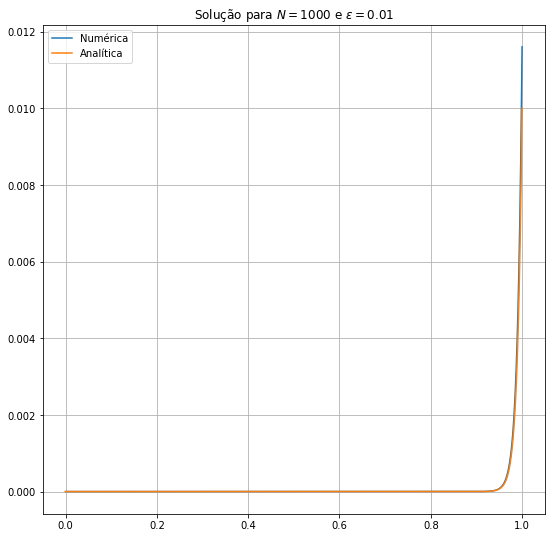

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Solução para $ N = 1000$ e $ \epsilon = 0.01 $')
plt.plot(eixo_x, eixo_y, label = 'Numérica')
plt.plot(eixo_x, analitica(eixo_x, 0.01), label = 'Analítica')
plt.legend()
plt.grid()
plt.show()

## Letra d)

In [ ]:
def rk4_du(du, t0, tf, eps, N):

  h = (tf - t0)/(N+1)

  for i in range(N):
    k1_du = (du[-1])*(1/eps)
    k2_du = (du[-1] + (h*k1_du/2))*(1/eps)
    k3_du = (du[-1] + (h*k2_du/2))*(1/eps)
    k4_du = (du[-1] + (h*k3_du))*(1/eps)

    dun = du[-1] + (h/6) * (k1_du+ 2*k2_du + 2*k3_du + k4_du)
    du.append(dun)

  return np.array(du)

def sec(chutes,N):

  ult_du_1 = rk4_du([chutes[-1]], 0, 1, 0.01, N)[-1] - 1
  ult_du_2 = rk4_du([chutes[-2]], 0, 1, 0.01, N)[-1] - 1

  while abs(ult_du_1) > 1e-6:

    frac = ((ult_du_1) * (chutes[-1] - chutes[-2]))/((ult_du_1) - (ult_du_2))

    new_chute = chutes[-1] - frac

    chutes.append(new_chute)

    ult_du_1 = rk4_du([chutes[-1]], 0, 1, 0.01, N)[-1] - 1
    ult_du_2 = rk4_du([chutes[-2]], 0, 1, 0.01, N)[-1] - 1

  return new_chute

du_s = rk4_du([sec([1,0], 1000)], 0, 1, 0.01, 1000)  # ---> Chute inicial para du

def rk4_u(u0, t0, tf, eps, N):
  u = [u0]
  h = (tf - t0)/(N+1)

  tn = [t0]
  ti = t0+h

  for i in range(N):

    k1 = du_s[i]
    k2 = du_s[i] + (h*k1/2)
    k3 = du_s[i] + (h*k2/2)
    k4 = du_s[i] + h*k3

    tn.append(ti)
    ti += h

    un = du_s[i] + h/6 * (k1+ 2*k2 + 2*k3 + k4)
    u.append(un)

  return np.array(tn), np.array(u)

In [ ]:
eixo_x_2, eixo_y_2 = rk4_u(0, 0, 1, 0.01, 1000)

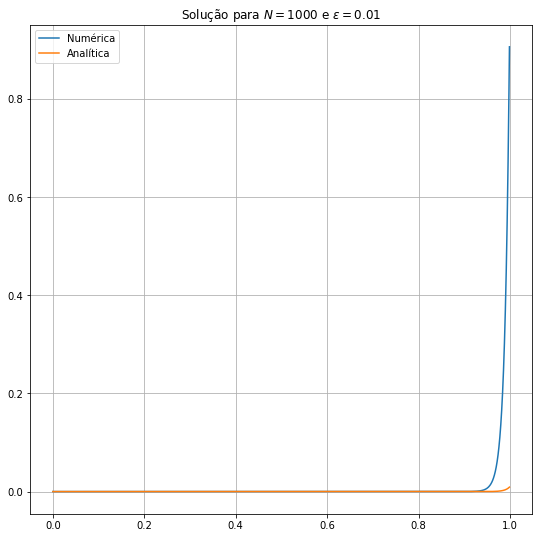

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Solução para $ N= 1000 $ e $ \epsilon = 0.01 $')
plt.plot(eixo_x_2, eixo_y_2, label = 'Numérica')
plt.plot(eixo_x_2, analitica(eixo_x_2, 0.01), label = 'Analítica')
plt.legend()
plt.grid()
plt.show()